In [1]:
from griblib import HARMONIE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import xarray as xr

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%config Completer.use_jedi = False
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 125

In [4]:
# plotting parameters
temp_lim = {'min': 10.0, 'max': 30.0}
#temp_lim = {'min': -50.0, 'max': 0.0}
wind_lim = {'min': 5.0, 'max': 20.0}
z_lim = {'min': 0.0, 'max': 15.0, 'dz': 5.0}

# parameters for great circle path
path_params = dict()
path_params['type'] = 'coordinates'
path_params['start'] = dict(lat=50.0, lon=4.0)
path_params['end'] = dict(lat=54.0, lon=7.0)
#path_params['type'] = 'range-azimuth'
#path_params['start'] = dict(lat=51.0, lon=0.0)
#path_params['range'] = 700.0e3
#path_params['azimuth'] = 60.0
dr = 1.0e3

In [5]:
import glob
#fid_grib = 'cy36/20190605_18/HARM_N25_201906051800_00000_GB'
#fid_grib = 'cy36/20190605_21/HARM_N25_201906052100_00000_GB'

#fid_grib = 'cy40/20190605_18/HA40_N25_201906051800_00200_GB'
#fid_grib = 'cy40/20190605_21/HA40_N25_201906052100_00100_GB'
#fid_grib = 'cy40/20190605_21/HA40_N25_201906052100_01200_GB'
gribs = glob.glob('cy40/*/*_GB')
for fid_grib in sorted(gribs):
    print(fid_grib)
    
fid_grib = 'cy40/20190606_00/HA40_N25_201906060000_00000_GB'

cy40/2019060400/HA40_N25_201906040000_00000_GB
cy40/2019060400/HA40_N25_201906040000_00100_GB
cy40/2019060400/HA40_N25_201906040000_00200_GB
cy40/2019060403/HA40_N25_201906040300_00000_GB
cy40/2019060403/HA40_N25_201906040300_00100_GB
cy40/2019060403/HA40_N25_201906040300_00200_GB
cy40/2019060406/HA40_N25_201906040600_00000_GB
cy40/2019060406/HA40_N25_201906040600_00100_GB
cy40/2019060406/HA40_N25_201906040600_00200_GB
cy40/2019060409/HA40_N25_201906040900_00000_GB
cy40/2019060409/HA40_N25_201906040900_00100_GB
cy40/2019060409/HA40_N25_201906040900_00200_GB
cy40/2019060412/HA40_N25_201906041200_00000_GB
cy40/2019060412/HA40_N25_201906041200_00100_GB
cy40/2019060412/HA40_N25_201906041200_00200_GB
cy40/2019060415/HA40_N25_201906041500_00000_GB
cy40/2019060415/HA40_N25_201906041500_00100_GB
cy40/2019060415/HA40_N25_201906041500_00200_GB
cy40/2019060418/HA40_N25_201906041800_00000_GB
cy40/2019060418/HA40_N25_201906041800_00100_GB
cy40/2019060418/HA40_N25_201906041800_00200_GB
cy40/20190604

In [6]:
my_atmos = HARMONIE(cycle='40')

In [7]:
request = [
    {'level_type': 'hybrid', 'var_list': ['z', 't', 'u', 'v', 'q', 'pdep', 'tke']},
    {'level_type': 'heightAboveGround', 'var_list': ['mld', 'ugst', 'vgst']},
    {'level_type': 'heightAboveGround', 'var_list': ['pres'], 'level': 0},
]

if my_atmos.cycle == 36:
    request.append({'level_type': 'hybrid', 'var_list': ['lsp', 'w']})
else:
    request.append({'level_type': 'hybrid', 'var_list': ['rain']})
    
ds = my_atmos.read_grib(fid_grib, request, compat='override')

ds_mslp = my_atmos.read_grib(fid_grib, [{'level_type': 'heightAboveSea'}])

ds = xr.merge([ds, ds_mslp.rename({'pres':'pres_msl'})])
del(ds_mslp)

********************************************************************************
Reading HARMONIE cy40 GRIB file [ cy40/20190606_00/HA40_N25_201906060000_00000_GB ]

Reading GRIB PV coefficients
Reading z on hybrid level
Reading t on hybrid level
Reading u on hybrid level
Reading v on hybrid level
Reading q on hybrid level
Reading pdep on hybrid level
Reading tke on hybrid level
Reading mld on heightAboveGround level
Reading ugst on heightAboveGround level
Reading vgst on heightAboveGround level
Reading pres on heightAboveGround level (level 0)
Reading rain on hybrid level
********************************************************************************
Reading HARMONIE cy40 GRIB file [ cy40/20190606_00/HA40_N25_201906060000_00000_GB ]

Reading GRIB PV coefficients
Reading all variables on heightAboveSea level


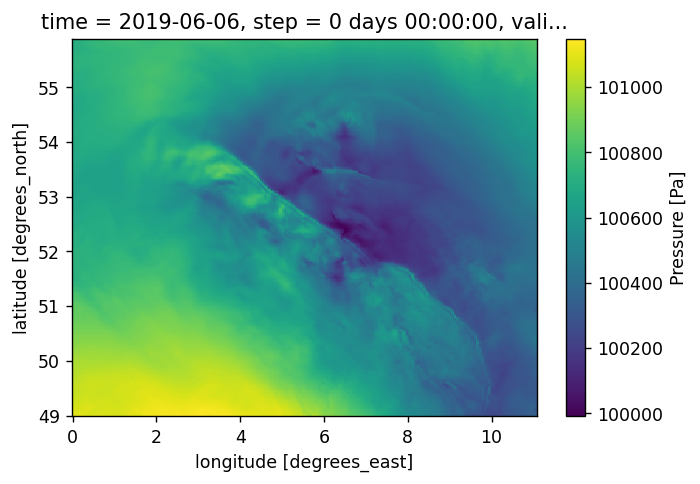

In [8]:
ds.pres_msl.plot()

In [9]:
t_fcst = (ds.valid_time).dt.strftime('%Y%m%d-%H').values

In [10]:
ds_gcp = my_atmos.extract_gcp_slice(ds, path_params, dr=dr)

In [11]:
ds_gcp

<xarray.Dataset>
Dimensions:            (distance: 492, hybrid: 65)
Coordinates:
  * hybrid             (hybrid) int64 1 2 3 4 5 6 7 8 ... 59 60 61 62 63 64 65
    time               datetime64[ns] 2019-06-06
    step               timedelta64[ns] 00:00:00
    valid_time         datetime64[ns] 2019-06-06
    heightAboveGround  int64 0
    heightAboveSea     int64 0
    longitude          (distance) float64 4.0 4.006 4.011 ... 6.987 6.993 7.0
    latitude           (distance) float64 50.0 50.01 50.02 ... 53.98 53.99 54.0
  * distance           (distance) float64 0.0 998.6 ... 4.893e+05 4.903e+05
    azimuth            (distance) float64 23.66 23.67 23.67 ... 26.02 26.03
Data variables:
    z                  (hybrid, distance) float64 nan nan nan ... 127.4 124.6
    t                  (hybrid, distance) float64 231.4 231.4 ... 287.7 287.7
    u                  (hybrid, distance) float64 -15.66 -15.69 ... -4.148
    v                  (hybrid, distance) float64 0.6314 0.61 ... -11.38 -11.3
    q                  (hybrid, distance) float64 5.055e-06 ... 0.008825
    pdep               (hybrid, distance) float64 -0.02477 -0.02311 ... -0.3772
    tke                (hybrid, distance) float64 0.001 0.001 ... 0.5679 0.5446
    mld                (distance) float64 551.0 566.5 ... 1.884e+03 1.961e+03
    ugst               (distance) float64 8.31 8.531 8.653 ... -3.898 -3.546
    vgst               (distance) float64 0.2557 0.3633 0.4849 ... -13.74 -13.6
    pres               (distance) float64 9.86e+04 9.866e+04 ... 1.003e+05
    rain               (hybrid, distance) float64 -1e-38 -1e-38 ... -2.118e-22
    pres_msl           (distance) float64 1.01e+05 1.01e+05 ... 1.003e+05

In [12]:
# Temperature (in degrees Celcius)
temperature = ds_gcp['t'].squeeze() - 273.15
#temperature -= temperature.mean(dim='distance')
temperature.attrs= {'long_name': 'temperature',
                    'units' : 'deg C',
                    'standard_name': 'air_temperature'}

# Wind speed
windspeed = np.sqrt(ds_gcp.u**2+ds_gcp.v**2).squeeze()
#windspeed = windspeed.where(windspeed > 0.95*wind_lim['min'])
windspeed.attrs= {'long_name': 'wind speed',
                    'units' : 'm/s',
                    'standard_name': 'wind_speed'}

In [13]:
lons = ds_gcp.longitude.values
lats = ds_gcp.latitude.values
coord_str = '({slo:.1f}E,{sla:.1f}N) > ({elo:.1f}E,{ela:.1f}N)'.format(
    slo=lons[0], sla=lats[0], elo=lons[-1], ela=lats[-1])
title_str = '{model}{cycle} fcst {time} UT - gcp {coords}'.format(
    model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst, coords=coord_str)

Text(0.5, 0, 'Distance [m]')

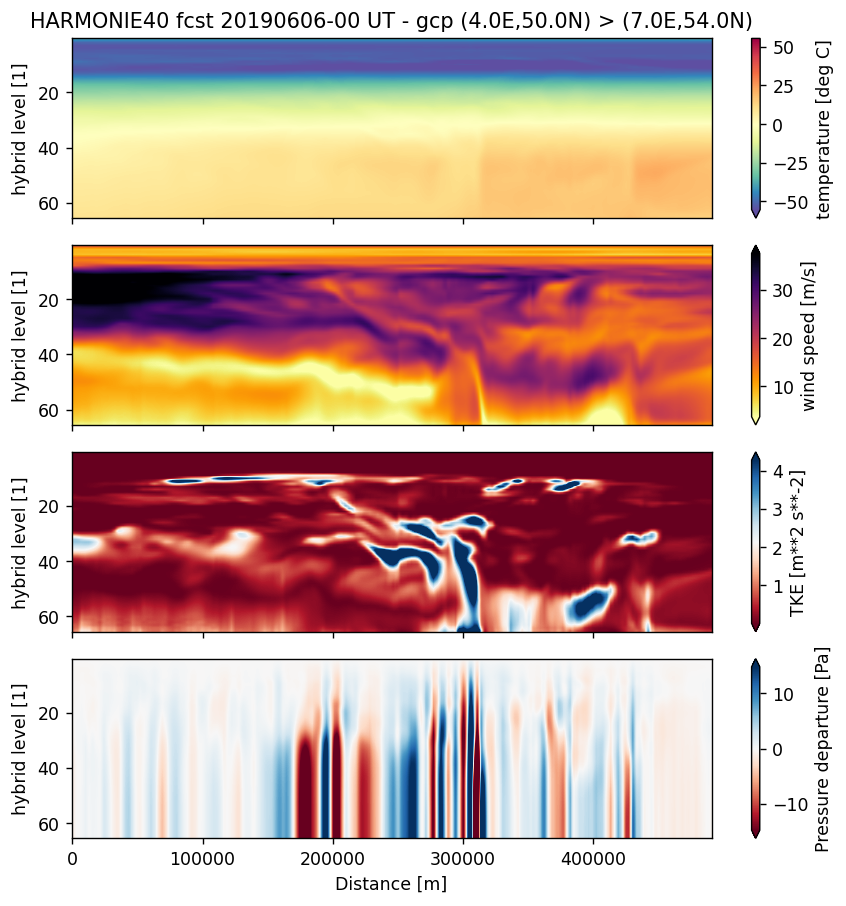

In [14]:
import matplotlib.colors as colors
n_plots = 4

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,8))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

temperature.plot.imshow(cmap='Spectral_r',
                        ax=ax[0],
                        robust=True,
#                         vmin=temp_lim['min'], vmax=temp_lim['max'],
                        origin='upper',
                        interpolation='bilinear')

windspeed.plot.imshow(cmap='inferno_r', 
                      ax=ax[1],
                      robust=True,
#                       vmin=wind_lim['min'], vmax=wind_lim['max'],
                      origin='upper',
                      interpolation='bilinear')

ds_gcp['tke'].plot.imshow(cmap='RdBu',
                        ax=ax[2],
                        robust=True,
#                         vmin=-0.2, vmax=0.2,
                        origin='upper',
                        interpolation='bilinear')

ds_gcp['pdep'].plot.imshow(cmap='RdBu',
                        ax=ax[3],
                        robust=True,
#                         vmin=-0.2, vmax=0.2,
                        origin='upper',
                        interpolation='bilinear')

for i in range(0,n_plots):
    ax[i].set_title('')
    ax[i].set_xlabel('')

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [m]')

In [15]:
# compute pressure, geopotential and geometric altitudes on model levels

(z, pres) = my_atmos.compute_altitude_pressure(t=ds_gcp.t,
                                               q=ds_gcp.q,
                                               ps=ds_gcp.pres,
                                               z0=ds_gcp.z.sel(hybrid=len(ds.hybrid)))
dens = my_atmos.compute_density(pres, ds_gcp.t)

import xarray as xr
ds_gcp = ds_gcp.drop(['z', 'pres'])
ds_gcp = xr.merge([z.to_dataset(), pres.to_dataset(), dens.to_dataset(), ds_gcp])

In [16]:
ds_gcp

<xarray.Dataset>
Dimensions:            (distance: 492, hybrid: 65)
Coordinates:
  * hybrid             (hybrid) int64 1 2 3 4 5 6 7 8 ... 59 60 61 62 63 64 65
    time               datetime64[ns] 2019-06-06
    step               timedelta64[ns] 00:00:00
    valid_time         datetime64[ns] 2019-06-06
    heightAboveGround  int64 0
    heightAboveSea     int64 0
    longitude          (distance) float64 4.0 4.006 4.011 ... 6.987 6.993 7.0
    latitude           (distance) float64 50.0 50.01 50.02 ... 53.98 53.99 54.0
  * distance           (distance) float64 0.0 998.6 ... 4.893e+05 4.903e+05
    azimuth            (distance) float64 23.66 23.67 23.67 ... 26.02 26.03
Data variables:
    z                  (hybrid, distance) float64 3.168e+04 3.168e+04 ... 25.25
    pres               (hybrid, distance) float64 1e+03 1e+03 ... 1.002e+05
    den                (hybrid, distance) float64 0.01505 0.01505 ... 1.213
    t                  (hybrid, distance) float64 231.4 231.4 ... 287.7 287.7
    u                  (hybrid, distance) float64 -15.66 -15.69 ... -4.148
    v                  (hybrid, distance) float64 0.6314 0.61 ... -11.38 -11.3
    q                  (hybrid, distance) float64 5.055e-06 ... 0.008825
    pdep               (hybrid, distance) float64 -0.02477 -0.02311 ... -0.3772
    tke                (hybrid, distance) float64 0.001 0.001 ... 0.5679 0.5446
    mld                (distance) float64 551.0 566.5 ... 1.884e+03 1.961e+03
    ugst               (distance) float64 8.31 8.531 8.653 ... -3.898 -3.546
    vgst               (distance) float64 0.2557 0.3633 0.4849 ... -13.74 -13.6
    rain               (hybrid, distance) float64 -1e-38 -1e-38 ... -2.118e-22
    pres_msl           (distance) float64 1.01e+05 1.01e+05 ... 1.003e+05

In [17]:
nlev = ds_gcp.dims['hybrid']
nrng = ds_gcp.dims['distance']

x = np.broadcast_to(np.expand_dims(ds_gcp.distance, axis=0), shape=(nlev, nrng)) / 1e3
y = ds_gcp.z / 1e3

print(x.shape, y.shape)

(65, 492) (65, 492)


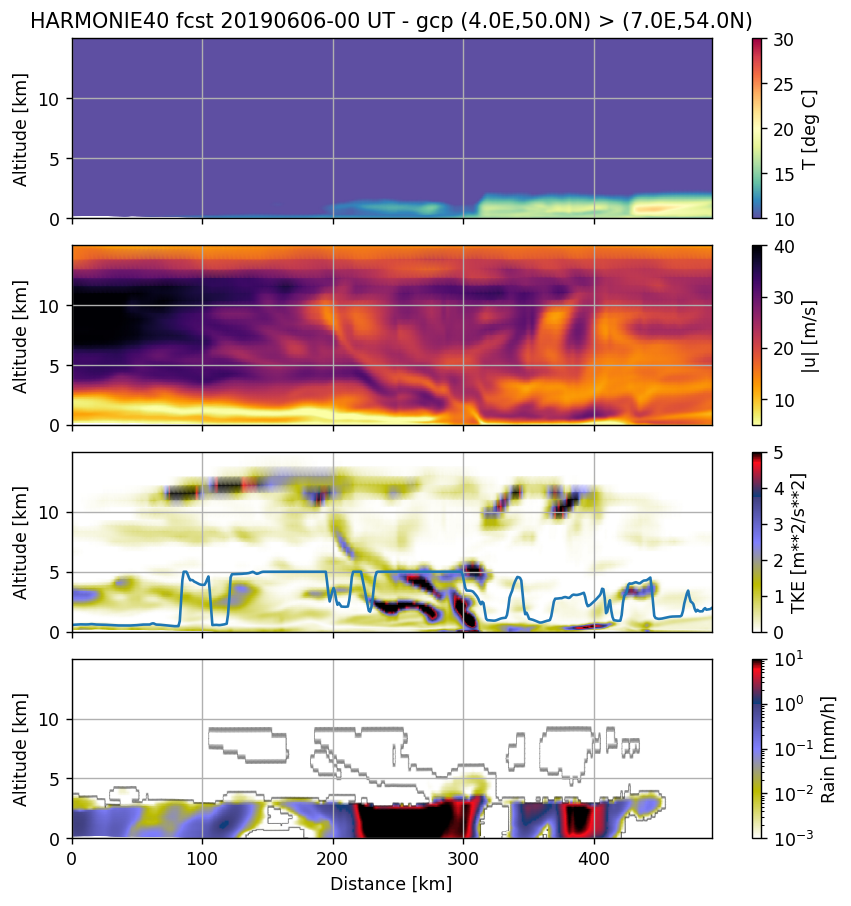

In [18]:
n_plots = 4
fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,8))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

im = ax[0].pcolormesh(x, y, temperature,
             cmap='Spectral_r', shading='gouraud',
             vmin=temp_lim['min'], vmax=temp_lim['max'])
plt.colorbar(im,ax=ax[0],label='T [deg C]')

im = ax[1].pcolormesh(x, y, windspeed,
             cmap='inferno_r', shading='gouraud',
             vmin=wind_lim['min'], vmax=40.0)

plt.colorbar(im,ax=ax[1],label='|u| [m/s]')

im = ax[2].pcolormesh(x, y, ds_gcp.tke,
             cmap='gist_stern_r', shading='gouraud',
             vmin=0, vmax=5.0)
ax[2].plot(ds_gcp.distance / 1e3, ds_gcp.mld / 1e3)
plt.colorbar(im,ax=ax[2],label='TKE [m**2/s**2]')

rain = ds_gcp.rain
im = ax[3].pcolormesh(x, y, rain*5*3600,
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=1e-3,vmax=10.0))
plt.colorbar(im,ax=ax[3],label='Rain [mm/h]')


for i in range(0,n_plots):
    ax[i].set_title('')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Altitude [km]')
    ax[i].set_ylim(z_lim['min'], z_lim['max'])
    ax[i].set_yticks(np.arange(z_lim['min'], z_lim['max'], z_lim['dz']))
    ax[i].grid()

plt.tight_layout

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_tuwp.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white', bbox_inches = 'tight')

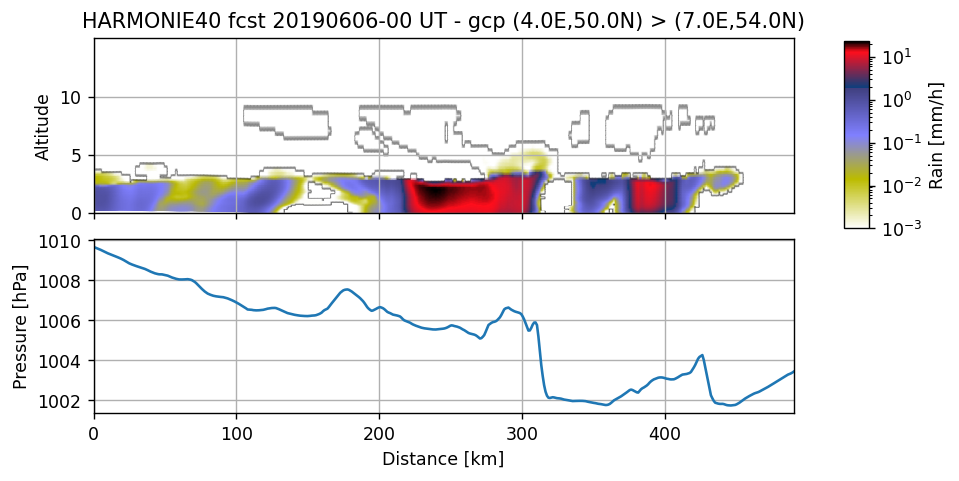

In [19]:
n_plots = 2
lev = 65

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,4))
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

rain = ds_gcp['rain']*5*3600
im = ax[0].pcolormesh(x, y, rain,
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=1e-3,vmax=rain.max()))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.52, 0.025, 0.375])
fig.colorbar(im, cax=cbar_ax, label='Rain [mm/h]')


ax[0].set_title('')
ax[0].set_ylabel('Altitude')
ax[0].set_ylim(z_lim['min'], z_lim['max'])
ax[0].set_yticks(np.arange(z_lim['min'], z_lim['max'], z_lim['dz']))
ax[0].set_xlabel('')

ax[1].plot(x[lev-1,:], ds_gcp['pres_msl'].values/1e2)
ax[1].set_ylabel('Pressure [hPa]')
#ax[1].set_ylim(1011, 1017)

for i in range(0,n_plots):
    ax[i].grid()

lons = ds_gcp.longitude.values
lats = ds_gcp.latitude.values
coord_str = '({slo:.1f}E,{sla:.1f}N) > ({elo:.1f}E,{ela:.1f}N)'.format(
    slo=lons[0], sla=lats[0], elo=lons[-1], ela=lats[-1])
gcp_title_str = '{model}{cycle} fcst {time} UT - gcp {coords}'.format(
    model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst, coords=coord_str)


plt.tight_layout

ax[0].set_title(title_str)
ax[1].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_pressure_rain.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white',  bbox_inches = 'tight')

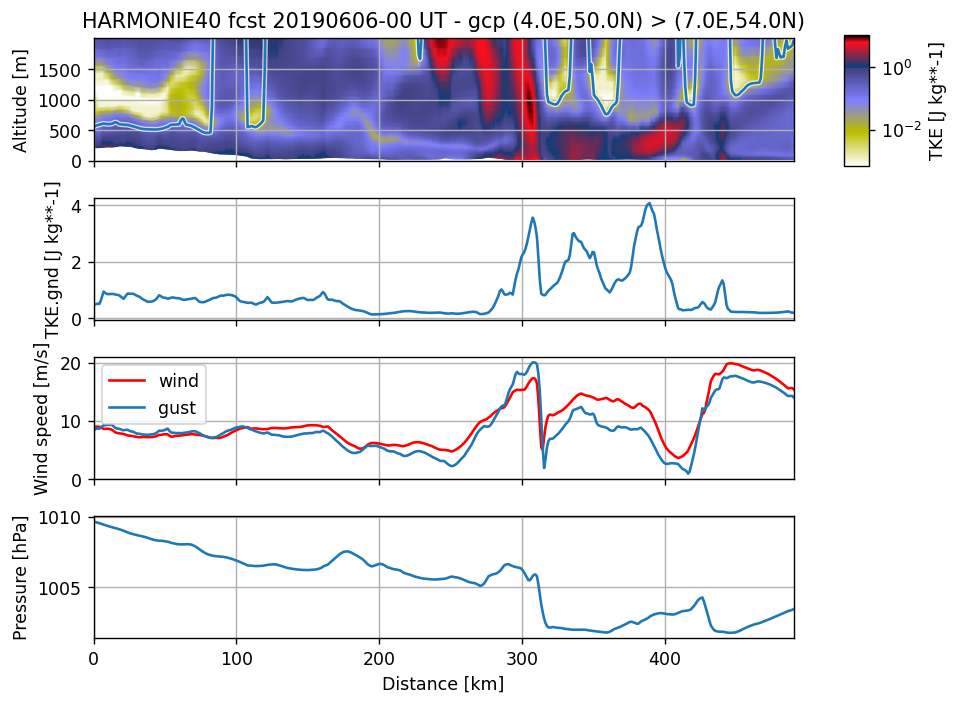

In [20]:
import matplotlib.patheffects as pe

n_plots = 4
lev = 60

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,6))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.3)


tke = ds_gcp['tke']

im = ax[0].pcolormesh(x, y*1e3, tke,
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=tke.min(),vmax=tke.max()))

ax[0].plot(x[lev-1,:], ds_gcp['mld'], 
           path_effects=[pe.Stroke(linewidth=3, foreground='w', alpha=0.75), pe.Normal()])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.73, 0.025, 0.175])
fig.colorbar(im, cax=cbar_ax, label='TKE [J kg**-1]')

z_lim['max'] = 2000.0
dz = 500.0

ax[0].set_title('')
ax[0].set_ylabel('Altitude [m]')
ax[0].set_ylim(z_lim['min'], z_lim['max'])
ax[0].set_yticks(np.arange(z_lim['min'], z_lim['max'], dz))
ax[0].set_xlabel('')

tke_gnd = ds_gcp['tke'].sel(hybrid=lev)
ax[1].plot(x[lev-1,:], tke_gnd)
ax[1].set_ylabel('TKE.gnd [J kg**-1]')

gust = np.sqrt(ds_gcp.ugst**2 + ds_gcp.vgst**2)
ws_gnd = windspeed.sel(hybrid=lev)
ax[2].plot(x[lev-1,:], ws_gnd, 'r', label='wind')
ax[2].plot(x[lev-1,:], gust, label='gust')
ax[2].set_ylabel('Wind speed [m/s]')
ax[2].legend()


ax[3].plot(x[lev-1,:], ds_gcp['pres_msl'].values/1e2)
ax[3].set_ylabel('Pressure [hPa]')
#ax[3].set_ylim(1011, 1017)

for i in range(0,n_plots):
    ax[i].grid()

plt.tight_layout

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_tke.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white', bbox_inches = 'tight')